## Importation des donn√©es
Nous importons les donn√©es du fichier CSV et affichons les types de donn√©es pour comprendre la structure du jeu de donn√©es.

In [1]:
import pandas as pd
data = pd.read_csv("C:\\Users\\AZIZ\\OneDrive\\Images\\IBM data science\\Cours 7\\Module 5\\kc_house_data.csv")
print(data.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


## R√©sum√© statistique des donn√©es
Nous utilisons la fonction describe() pour obtenir un r√©sum√© statistique des colonnes num√©riques

In [3]:
data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

## Suppression de colonnes inutiles
Pour simplifier le jeu de donn√©es, nous supprimons la colonne id, qui n'est pas utile pour les analyses.

In [4]:
data.drop(columns=["id"], inplace=True)
print(data.describe())

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

## Comptage des maisons par nombre d'√©tages
Nous comptons les occurrences uniques dans la colonne floors et convertissons le r√©sultat en DataFrame.

In [5]:
floor_counts = data["floors"].value_counts().to_frame()
print(floor_counts)

        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


## Boxplot des prix en fonction de la vue sur le front de mer
Nous utilisons un boxplot pour visualiser si les maisons avec vue sur le front de mer (waterfront) ont des prix diff√©rents et plus d'outliers.

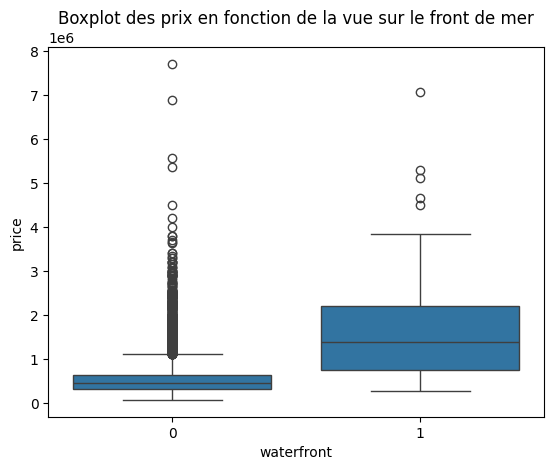

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="waterfront", y="price", data=data)
plt.title("Boxplot des prix en fonction de la vue sur le front de mer")
plt.show()

 ## Corr√©lation entre sqft_above et le prix
Nous utilisons regplot pour examiner la relation entre la surface habitable au-dessus du sous-sol (sqft_above) et le prix des maisons.

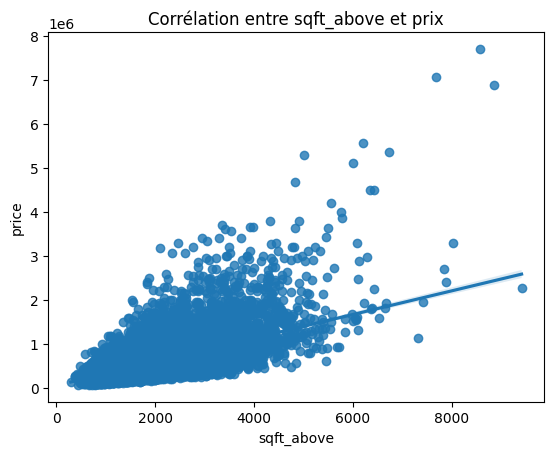

In [7]:
sns.regplot(x="sqft_above", y="price", data=data)
plt.title("Corr√©lation entre sqft_above et prix")
plt.show()

## R√©gression lin√©aire pour pr√©dire le prix √† partir de sqft_living
Nous utilisons un mod√®le de r√©gression lin√©aire pour pr√©dire les prix en fonction de la surface habitable totale.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = data[["sqft_living"]]
y = data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R¬≤ pour sqft_living :", r2)


R¬≤ pour sqft_living : 0.49406905389089006


## R√©gression multivari√©e avec plusieurs caract√©ristiques
Nous utilisons un ensemble de plusieurs caract√©ristiques pour am√©liorer le mod√®le de r√©gression.

In [9]:
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement",
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

X = data[features]
y = data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R¬≤ pour les caract√©ristiques multiples :", r2)

R¬≤ pour les caract√©ristiques multiples : 0.6615003078951851


## Pipeline pour r√©gression polynomiale
Nous cr√©ons un pipeline avec un standardiseur, une transformation polynomiale et une r√©gression lin√©aire pour am√©liorer les pr√©dictions.

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2)),
    ("model", LinearRegression())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R¬≤ avec pipeline :", r2)

R¬≤ avec pipeline : 0.7114682256355127


## R√©gression Ridge
Pour mieux contr√¥ler le surapprentissage, nous utilisons une r√©gression Ridge avec une p√©nalisation ùõº=0.1.
Nous entra√Ænons le mod√®le sur l'ensemble d'entra√Ænement et calculons le R¬≤ sur les donn√©es de test.

In [11]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R¬≤ pour Ridge :", r2)

R¬≤ pour Ridge : 0.6614734596866666


## R√©gression Ridge avec transformation polynomiale
Pour am√©liorer les performances, nous appliquons une transformation polynomiale de degr√© 2 sur les donn√©es d'entr√©e avant d'entra√Æner une r√©gression Ridge.

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

ridge = Ridge(alpha=0.1)
ridge.fit(X_train_poly, y_train)
y_pred = ridge.predict(X_test_poly)

r2 = r2_score(y_test, y_pred)
print("R¬≤ pour Ridge avec transformation polynomiale :", r2)

R¬≤ pour Ridge avec transformation polynomiale : 0.7003486872313182


### √Ä propos de l'auteur

---

üåü **Projet r√©alis√© par : [Abdoul Aziz Gueye]** üåü  
üìö **√âtudiant en Master :** Intelligence Artificielle et Big Data  
üí° **Passionn√© par :** La science des donn√©es, l'intelligence artificielle, et la cr√©ation de projets innovants et amusants.  

üì´ **Contact :** [aziznjr420@gmail.com]  

---